# Project Idea:  Sales Performance Dashboard

## Dataset:  Superstore Sales Data

- **Content**: Includes Sales, Profit, Shipping Data, Customer Details, Product Details, and Regional Information spanning several years.
- **Source**: [Kaggle - Superstore Sales Data](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting)

## Stakeholders:
1. **Sales Managers**: Interested in tracking sales performance by region, product category, and salesperson.
2. **Marketing Team**: Needs insights on customer buying patterns, seasonal trends, and product preferences.
3. **Supply Chain Managers**: Looks for data on shipping times, costs, and vendor performance.
4. **Executive Team**: Requires high-level summaries of overall business health and growth opportunities.

## Requirements:
- **Interactive Sales Maps**: Visualize sales by geographical regions.
- **Product Performance Analysis**: Identify top-selling and least-selling products.
- **Customer Segmentation**: Group customers based on purchasing behavior and demographics.
- **Time Series Analysis**: Trends in sales and profits over different time periods.
- **Supply Chain Insights**: Average shipping times.
- **KPI Dashboards**: Key Performance Indicators like total sales and year-over-year growth.

## Steps and Best Practices:
- **Ensure Data Quality and Cleanliness**: Before any analysis, it's crucial to clean and preprocess the data to ensure accuracy and reliability.
- **Perform EDA (Exploratory Data Analysis)**: Use EDA to uncover patterns, spot anomalies, and frame the right questions for further analysis. This foundational step is key to understanding the data before diving into predictive analytics or dashboard creation.
- **Utilize Power BI's Capabilities**: Leverage Power BI for its strong interactive visual elements, which can enhance the understanding and presentation of your data.
- **User-Centric Design**: Focus on creating a user-friendly and intuitive interface. Consider the end-user's perspective and requirements in all design aspects.
- **Data Storytelling**: Incorporate storytelling techniques to present data in a way that is engaging and easily understood by stakeholders. This helps in making complex data more relatable.
- **Regular Updates for Dashboard**: Ensure the dashboard reflects the most current data for accurate decision-making. This involves regularly refreshing the data sources and updating the visualizations.


**Note**: This project will not only enhance your skills in Power BI but also provide practical insights into data analysis and visualization best practices.


## The first two steps of the project we will be working on the JupterNotebook and the others steps we will continue on PowerBI 

In [363]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib.rcParams['figure.figsize'] = (8,6)

In [364]:
df = pd.read_csv("DataSet/sales_data.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [365]:
#Checking for duplicates, errors, missing values ect.

# Missing values
missing_val = df[df.isnull().any(axis=1)]
print("Missing values nr:", len(missing_val)) #Since there are only 11 records I will drop these rows
df = df.dropna() #Drops all records with missing values 

# Duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicates nr is:", len(duplicate_rows)) #No duplicates found



Missing values nr: 11
Duplicates nr is: 0


# Perform EDA (Exploratory Data Analysis):
- Use EDA to uncover patterns, spot anomalies, and frame the right questions for further analysis. This foundational step is key to understanding the data before diving into predictive analytics or dashboard creation.

## Inital check and understanding of the data quality and content

In [366]:
df.info() #Getting info if there is missing values  and data type

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [367]:
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


#### Observations: 
- The third quartile is significantly lower than the max value 
- The mean and the median values are very diffrent meaning the data is skewed, potentially having outliers

#### Hypothesis: 


- Based on the 2 observed  difrencies I can raise the hypothesis that the data has outliers or high-values sales compared to the normal distribution of the sales.
- Certain transactions or products or categories have significantly higher sales, suggesting potential business insights.
- Outliers might be a result of low data quality

In [368]:
df.isnull().sum() #0 missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [369]:
df.nunique() #Checking for unique values 

Row ID           9789
Order ID         4916
Order Date       1229
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              48
Postal Code       626
Region              4
Product ID       1860
Category            3
Sub-Category       17
Product Name     1848
Sales            5750
dtype: int64

In [370]:
# Checking correlation between numerical values: No correlation found on the numerical values
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

correlation_matrix


,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,-0.000434
Postal Code,0.013645,1.000000,-0.024067
Sales,-0.000434,-0.024067,1.000000


In [562]:
#Conveting the date to datime time objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


print(df['Order Date'].min())
print(df['Order Date'].max())
# df.info()

2015-01-03 00:00:00
2018-12-30 00:00:00


# Investigating sales by geographical location

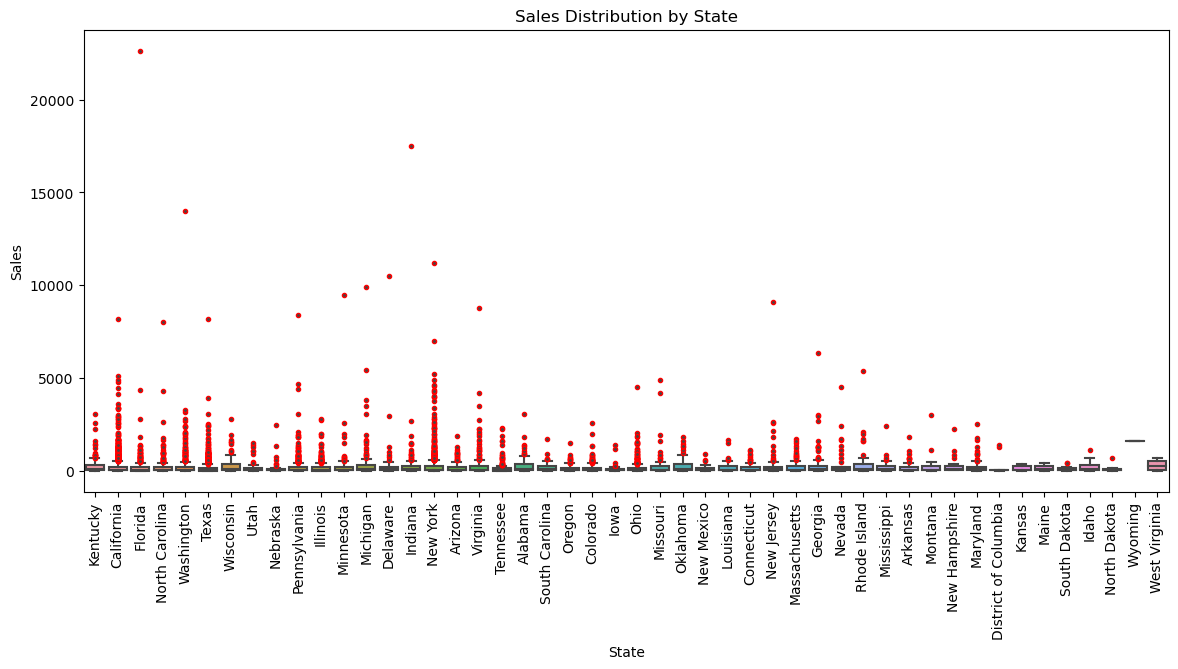

In [497]:
plt.figure(figsize=(14, 6))

flierprops = dict(marker='o', markersize=3, linestyle='None', markeredgecolor='red')

# Create the boxplot with customized fliers
sns.boxplot(x='State', y='Sales', data=df, flierprops=flierprops)
plt.xticks(rotation=90)  # Rotate the state labels for better readability
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()


## Sales by state

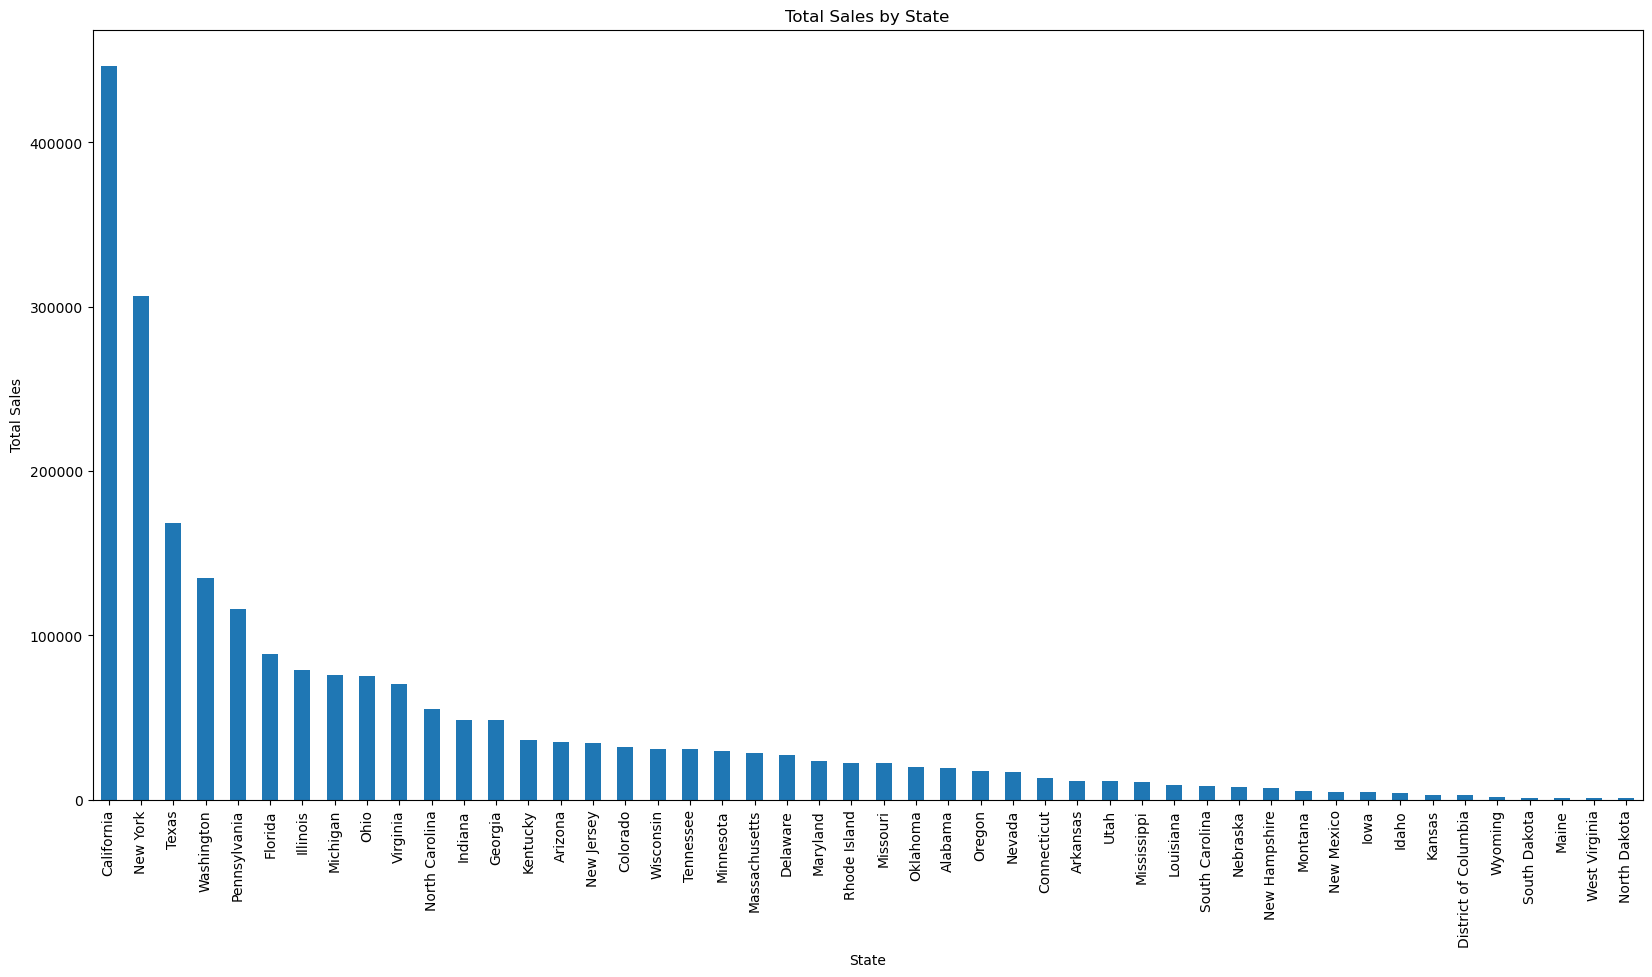

In [416]:
# Group by 'State' to calculate the sum of sales
sales_per_state = df.groupby('State').sum(numeric_only=True).sort_values("Sales", ascending=False)


# Assuming 'sales_per_state' is your DataFrame with 'Sales' being the summed total sales per state
sales_per_state['Sales'].plot(kind='bar', figsize=(20, 10))
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate the state labels for better readability
plt.show()


# Investigating Product performance

In [374]:
#Finding Most Sold and Least Sold products

# Calculate the sum of sales for each product
most_sold_products = df.groupby("Product Name").sum(numeric_only=True).sort_values("Sales", ascending=False)

# Count the number of times each product has been sold 
# Converting the Series to a DataFrame
times_sold = df['Product Name'].value_counts()
times_sold_df = times_sold.rename_axis('Product Name').reset_index(name='Times Sold')

# Merging the new 'Times Sold column' with the the most_sold_product df
most_sold_products = most_sold_products.merge(times_sold_df, on='Product Name', how='left')


most_sold_products.head(10)




,Product Name,Row ID,Postal Code,Sales,Times Sold
0,Canon imageCLASS 2200 Advanced Copier,28222,194875.0,61599.824,5
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,61859,562064.0,27453.384,10
2,Cisco TelePresence System EX90 Videoconferenci...,2698,32216.0,22638.480,1
3,HON 5400 Series Task Chairs for Big and Tall,44560,448062.0,21870.576,8
4,GBC DocuBind TL300 Electric Binding System,64915,381549.0,19823.479,11
5,GBC Ibimaster 500 Manual ProClick Binding System,57937,302599.0,19024.500,9
6,Hewlett Packard LaserJet 3310 Copier,41444,428939.0,18839.686,8
7,HP Designjet T520 Inkjet Large Format Printer ...,19245,60433.0,18374.895,3
8,GBC DocuBind P400 Electric Binding System,27597,339780.0,17965.068,6
9,High Speed Automatic Electric Letter Opener,13590,266895.0,17030.312,3


In [375]:
#Least sold products, accesing most sold products and reversing so they are sorted by the least sold 
least_sold_product = most_sold_products[-10:][::-1]
least_sold_product

,Product Name,Row ID,Postal Code,Sales,Times Sold
1847,Eureka Disposable Bags for Sanitaire Vibra Gro...,262,77506.0,1.624,1
1846,Avery 5,4551,6040.0,5.760,1
1845,Xerox 20,5559,89031.0,6.480,1
1844,Grip Seal Envelopes,9379,60610.0,7.072,1
1843,Acme Serrated Blade Letter Opener,8941,33161.0,7.632,1
1842,Avery Hi-Liter Pen Style Six-Color Fluorescent...,8337,22204.0,7.700,1
1841,Avery Hi-Liter Comfort Grip Fluorescent Highli...,8748,97841.0,7.800,2
1840,Xerox 1989,2267,28110.0,7.968,1
1839,Stockwell Gold Paper Clips,2525,29152.0,8.096,2
1838,Acco Economy Flexible Poly Round Ring Binder,18585,208450.0,8.352,3


# Customer Segmentation

In [417]:
segment_sales_sum = df.select_dtypes(include=[np.number]) \
                        .groupby(df['Segment'])['Sales'] \
                        .sum() \
                        .sort_values(ascending=False) \
                        .reset_index()

segment_sales_sum
#Below we can tell that the most sold products are for  Consumer followed by Corporate and than Home Office

,Segment,Sales
0,Consumer,1.146708e+06
1,Corporate,6.822118e+05
2,Home Office,4.236874e+05


In [557]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Day of Month,Day of the Week,Month,Year,Shipping Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,Wednesday,11,2017-01-01,3


In [566]:
#Checking the customers order frequency with our super store
#I will group by Cutomer ID and Count the unique OrderID's within the dataframe

# Filter the DataFrame for the year 2018
df_2018 = df[df['Year'] == 2018]

# Group by 'Customer ID' and count unique 'Order IDs'
unique_order_counts = df_2018.groupby('Customer ID')['Order ID'].nunique()

# Calculate the mean of these unique order counts
order_freq_2018 = unique_order_counts.mean()
order_freq_2018

2.4078374455732945

In [567]:
# Filter the DataFrame for the year 2017
df_2017 = df[df['Year'] == 2017]

# Group by 'Customer ID' and count unique 'Order IDs'
unique_order_counts_2017 = df_2017.groupby('Customer ID')['Order ID'].nunique()

# Calculate the mean of these unique order counts for 2017
order_freq_2017 = unique_order_counts_2017.mean()
order_freq_2017


2.0362204724409447

In [572]:
order_frequency_growth = (order_freq_2018  - order_freq_2017 )/ order_freq_2017 * 100
order_frequency_growth

18.250330853754225


# Looking for seasonal trends and patterns

2015-01-03 00:00:00
2018-12-30 00:00:00


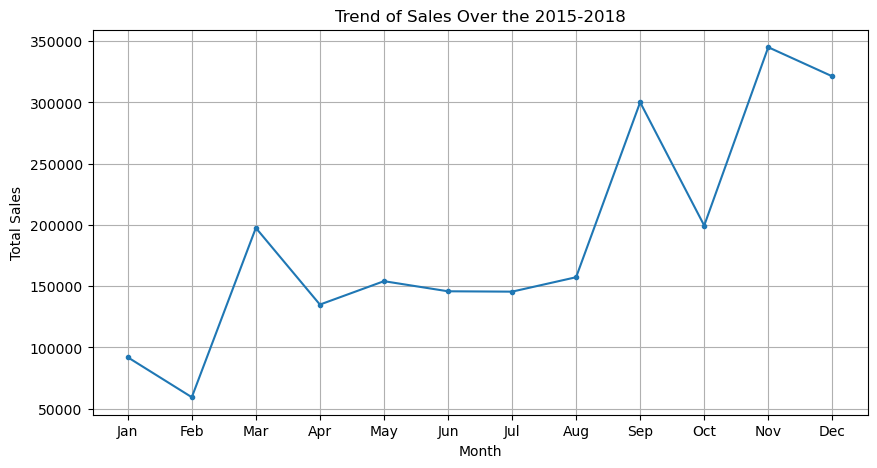

In [505]:

month_of_year = df.groupby('Month')['Sales'].sum()


plt.figure(figsize=(10, 5))

plt.plot(month_of_year.index, month_of_year.values, marker='.')  
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Trend of Sales Over the 2015-2018')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# all_sales = month_of_year.sum() #Checking for errors



In [ ]:
# March sales peak likely due to fiscal year-end spending

# Steady mid-year sales 

# Towards the end of the year sales grow continuesly 

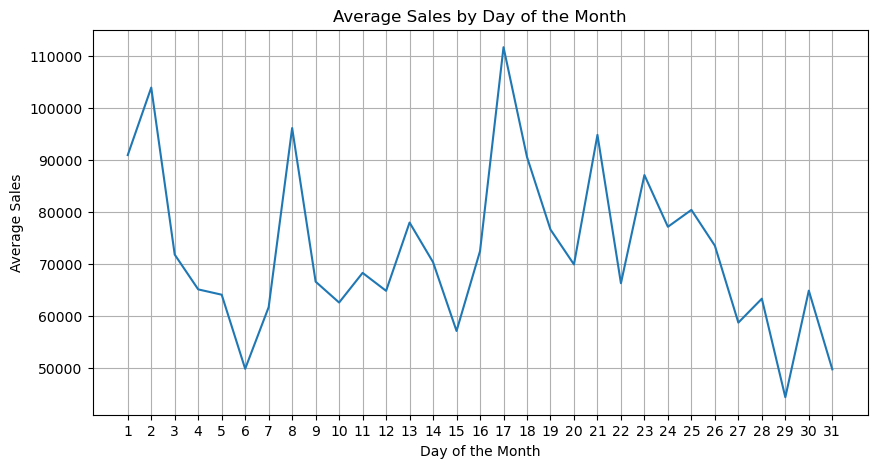

In [466]:
#Trying to identify patterns for the sales over a month

df['Day of Month'] = df['Order Date'].dt.day

# Group by the day of the month and calculating the mean sales 
day_of_month = df.groupby('Day of Month')['Sales'].sum()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(day_of_month.index, average_daily_sales.values)
plt.title('Average Sales by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 32))  # Set x-ticks for each day
plt.grid(True)
plt.show()

In [492]:
# Sales start strong early in the month and see another rise mid-month.
# There's a noticeable drop in sales towards the end of the month, 
# possibly as customers await their next paycheck.


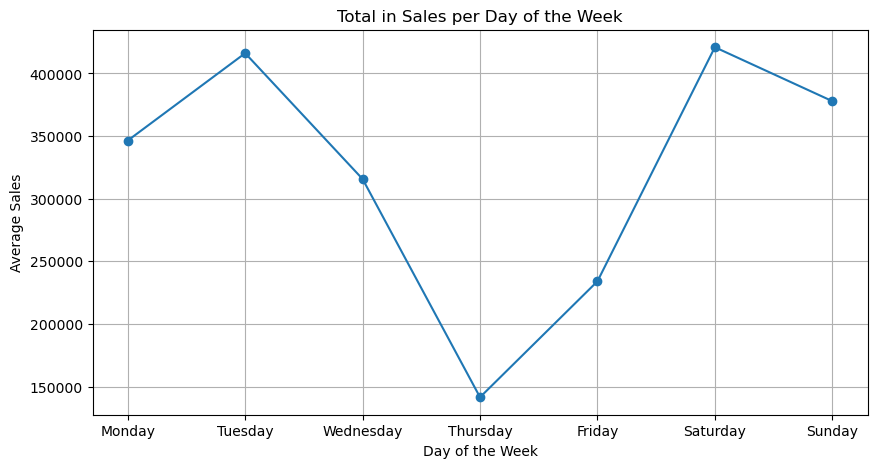

In [447]:
#Trying to identify patterns for the sales over a week
# Create a new column for the day of the week
df['Day of the Week'] = df['Order Date'].dt.day_name()

# Group by the day of the week and calculate the mean sales
average_weekday_sales = df.groupby('Day of the Week')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting - using line plot this time
plt.figure(figsize=(10, 5))
plt.plot(average_weekday_sales.index, average_weekday_sales.values, marker='o')  # Added marker for clarity

plt.title('Total in Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

In [383]:
# Following the above results I decided to perform a check on the days with least sales: Wednesday and Thursday. 
# I want to check if  the nr of sales(count) is low on those days OR it is just low valued products selling more


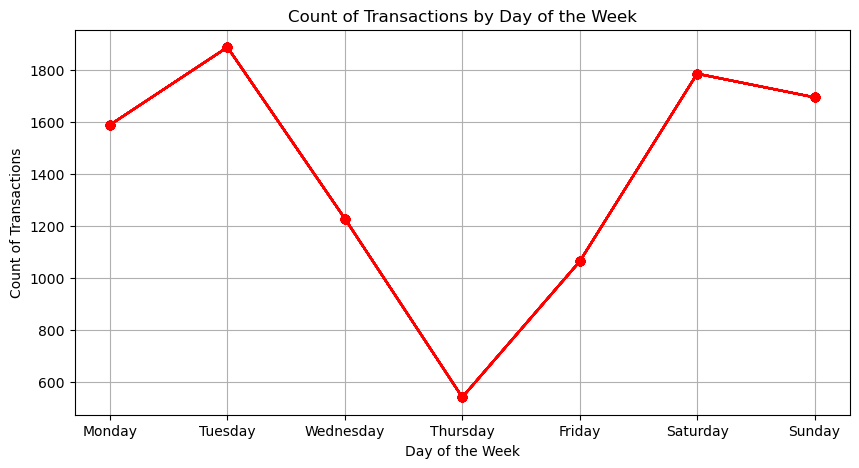

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day of Month,Day of the Week,Month,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,Wednesday,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,8,Wednesday,11,2017


In [448]:
# Count of transactions per day of the week
count_weekday_sales = df.groupby('Day of the Week').count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(count_weekday_sales.index, count_weekday_sales.values, marker='o', color='red')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.grid(True)
plt.show()

df.head(2)

In [453]:
sum_week_days =  df.groupby('Day of the Week').sum(numeric_only=True).sort_values(by="Sales", ascending=False)
sum_week_days


,Row ID,Postal Code,Sales,Day of Month,Month,Year
Day of the Week,,,,,,
Saturday,8519988,94905170.0,420901.4763,27184,14100,3601846
Tuesday,9205706,104819342.0,416131.0243,29560,14415,3807539
Sunday,8054406,93730886.0,377868.7779,25350,13515,3418380
Monday,7406863,90807297.0,346404.0416,25082,12303,3204677
Wednesday,6337696,67728810.0,315683.9422,19620,9431,2476125
Friday,5449953,60581859.0,234073.6602,16047,8489,2144482
Thursday,2959239,28497189.0,141544.4902,8757,4323,1088658


In [454]:
mean_week_day =  df.groupby('Day of the Week').mean(numeric_only=True).sort_values(by="Sales", ascending=False)
mean_week_day

,Row ID,Postal Code,Sales,Day of Month,Month,Year
Day of the Week,,,,,,
Thursday,5480.072222,52772.572222,262.119426,16.216667,8.005556,2016.033333
Wednesday,5160.990228,55153.754072,257.071614,15.977199,7.679967,2016.388436
Saturday,4770.430011,53138.393057,235.667120,15.220605,7.894737,2016.711086
Sunday,4751.861947,55298.457817,222.931432,14.955752,7.973451,2016.743363
Tuesday,4875.903602,55518.719280,220.408382,15.656780,7.635064,2016.704979
Friday,5126.954845,56991.400753,220.200997,15.095955,7.985889,2017.386642
Monday,4661.336060,57147.449339,218.001285,15.784770,7.742605,2016.788546


In [459]:
# Group by 'Day of the Week' and count the occurrences
count_week_day = df.groupby('Day of the Week').count()

# Sort the values by 'Sales' in descending order
count_week_day_sorted = count_week_day.sort_values(by="Sales", ascending=False)

# Keep only the 'Sales' column
count_week_day_final = count_week_day_sorted[['Sales']]
count_week_day_final

,Sales
Day of the Week,
Tuesday,1888
Saturday,1786
Sunday,1695
Monday,1589
Wednesday,1228
Friday,1063
Thursday,540


In [460]:

# 1- Checking the results above I can cofirm that the days with the most sales in revenue are:
        #Saturday---Tuesday---Sunday---Monday---Wednesday----Friday---Thursday
    

    
# 2 -  Days with the the most number of sale, are as follows:
        #Tuesday---Saturday---Sunday---Monday---Wednesday----Friday---Thursday
    

    
# 3-  Days with the the best average per sale, are as follows:
        #Thursday---Wednesday---Saturday---Sonday---Tuesday----Friday---Monday
    
#Conclusion 

# The number of sales matches the total number of sales in revenue which is understandable
# The mean values of the sales per each day are suprizingly on the days with least nr of sales, 
# meaning we have some expensive products being purchased on those days


# Investigating Shiping times


In [509]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day of Month,Day of the Week,Month,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,8,Wednesday,11,2017


In [520]:
#Creating new column shiping time 
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate the average shipping time
average_shipping_time = df['Shipping Time'].mean()

# Calculate the average shipping time per state
average_shipping_time_per_state = df.groupby('State')['Shipping Time'].mean().sort_values(ascending=False)
# Output the results
print(f"Average Shipping Time: {average_shipping_time} days")
# print("Average Shipping Time per State:")
# print(average_shipping_time_per_state) ##Uncomment this line to see the results



# Average Shipping Time: 4 days

#By calculating the average shipping time accros all states I identified states which need to improve the shiping time. 
# District of Columbia    5.7 days
# Wyoming                 5 days
# Maine                   5 days
# Iowa                    4 days
# Montana                 4 days
# New Mexico              4.5 days
# Oklahoma                4.4 days
# Minnesota               4.4 days
# New Jersey              4.4 days

Average Shipping Time: 3.961180917356216 days


In [521]:
#I will check if there is a correlation between the sales and the shiping time 

In [536]:
numeric_df1 = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df1.corr()
# correlation_matrix

sales_shipping_correlation = correlation_matrix.loc['Sales', 'Shipping Time']
print(f"Correlation between Total Sales and Shipping Time: {sales_shipping_correlation:.2f}")

#No Correlation found


Correlation between Total Sales and Shipping Time: -0.01


# KEY Performance Indicators (KPI )

In [388]:
#GROWTH,sales, profit margin, number of new customers, etc.

In [537]:
#Last availbale year of data is 2018, so when we refer to Current Year it will be refering to 2018

In [546]:

#Last availbale year of data is 2018, so when we refer to Current Year it will be refering to 2018

current_year = 2018

# Calculate current year sales
current_year_sales = df[df['Year'].dt.year == current_year]['Sales'].sum()

# Calculate previous year
previous_year = current_year - 1

# Calculate previous year sales
previous_year_sales = df[df['Year'].dt.year == previous_year]['Sales'].sum()

print(f"Current Year Sales: {current_year_sales:.2f}")
print(f"Previous Year Sales: {previous_year_sales:.2f}")

# Calculate the growth percentage
growth_percentage = ((current_year_sales - previous_year_sales) / previous_year_sales) * 100

print(f"Growth Percentage: {growth_percentage:.2f}%")



Current Year Sales: 721209.81
Previous Year Sales: 597225.49
Growth Percentage: 20.76%


In [547]:
# Calculate shipping time for the current year
current_year_shipping_time = df[df['Year'].dt.year == current_year]['Shipping Time'].mean()

# Calculate shipping time for the previous year
previous_year_shipping_time = df[df['Year'].dt.year == previous_year]['Shipping Time'].mean()

# Calculate the growth in shipping time
shipping_time_growth = ((current_year_shipping_time - previous_year_shipping_time) / previous_year_shipping_time) * 100

print(f"Current Year Shipping Time: {current_year_shipping_time:.2f} days")
print(f"Previous Year Shipping Time: {previous_year_shipping_time:.2f} days")
print(f"Shipping Time Growth: {shipping_time_growth:.2f}%")


Current Year Shipping Time: 3.90 days
Previous Year Shipping Time: 3.95 days
Shipping Time Growth: -1.03%


In [574]:
print(order_freq_2018)
order_frequency_growth

2.4078374455732945


18.250330853754225